# **Final Report - Breast Cancer Tumor Classification**
### Professor Michael Pavlin 
### MGTA611 - Winter 2021
 

## *Contents*

* Introduction
* Data
    - Image Downloading and formatting
* Building the Baseline Neural Network (i.e. Traditional Method)
* Building the Convolutional Neural Network
    - Data preprocessing 
* Data Preprocessing
* Non-Convolutional Neural Network
* Convolutional Neural Network
* Modifying our ConvNet
* Pre-Trained Convnets
* Accuracy Measurements
* Conclusion
* Appendix


## *Introduction*

Although the screening of breast cancer has been found to greatly reducing mortality among breast cancer patients, there has been high rates of false positives and negatives documented in the U.S and Canada. More specifically the average sensitivity of digital mammography has been on average around 86.7% while the average specificity around 88.9%. 

With these numbers, it is safe to state that breast cancer detection has proved to be been a major issue for the pathologists and medical practitioners in diagnosis and treatment planning of the second leading cause of cancer deaths in the world. 

The manual identification of cancer from microscopic biopsy images is to some degree subjective in nature and may vary from expert to expert depending on their expertise and other factors including lack of specific and accurate quantitative measures to classify the biopsy images as harmless (benign) or cancerous (malignant) one. 

For this project, we aim to use Deep Learning to classify microscopic images of breast tumor tissue into benign or malignant categories to facilitate a speedy and accurate workflow to be used as an additional tool in tackling the challenges stated above. 

Traditionally, we know that the distinction between the two have been at times a daunting task for pathologists, resulting in the conservative approach of going the treatment route for a patient that may not have otherwise needed treatment. We aim to use Convolutional Neural Networks to create a higher level of confidence in both the diagnosis as well as the treatment of these varying cases, as well as to reduce both the emotional trauma as well as the costs associated with undergoing unnecessary treatments.

We will be demonstrating our efforts to increase the accuracy of Neural Nets and for our final metrics, we aim to look at not only the prediction accuracy on our testing data, but also pay particular attention to the precision of true positives (TP), true negatives (TN), false positive (FP) and false negative (FN). 

Lastly, throughout this report, we have included additional information either above or inside each block code for enhanced readability. 

##  *Data*

Our dataset is obtained from The Breast Cancer Histopathological Image Classification (BreakHis). It is composed of 9,109 microscopic images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). It contains 2,480 benign and 5,420 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). This database has been built in collaboration with the P&D Laboratory – Pathological Anatomy and Cytopathology, Parana, Brazil. 

What we really liked about this dataset compared to others was that it provided microscopic images at different levels of magnification compared to most datasets in this category which usually only provide one. This characteristic of the data paired with the limited number of images available will most likely affect the overall accuracy compared to models that are trained on only one magnification. However, this will *allow for the development of a more flexible/universal model* which can process several different magnifications of images while still being accurate enough to assist the pathologist in making a final decision.

We have included the direct link to this data set here:

https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/

## Image Downloading & Formatting

The following section is dedicated to the preparation of the data which includes:
1. Creating the appropriate training, validation & testing folders with malignant & benign subfolders to store images.
2. Copying all images from the original dataset into two temporary folders to split the benign and malignant images.
3. Randomly shuffling the images to eliminate bias.
4. Copying the images into the appropriate folders created in step 1.

We will be going through each of these steps separately.

### 1. Creating the appropriate training, validation & testing folders with malignant & benign subfolders

To effectively organize our data, different folders will be created and given a simple and clear name to facilitate the process of having to refer to our training, validation or test dataset for both benign and malignant images.

In [1]:
import keras 
keras.__version__

# Keras is a deep-learning framework for python 

Using TensorFlow backend.


'2.3.1'

In [2]:
import os, shutil

# OS module in Python provides functions for interacting with the operating system
# Shutil module helps you automate copying files and directories

In [3]:
# The path to the directory where all the benign and malignant images available will be placed

original_dataset_dir = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\benign_and_malignant_full'

In [4]:
# The directory where we will store our final dataset used in this project
base_dir = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\benign_vs_malignant_full'
#os.mkdir(base_dir) # Use of os.mkdir() method to create directory/file - these lines were commented out because directories were already created

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train') # Use of os.path.join() method to join various path components - in this case adding the subfolder 'train' to the the base_dir
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training benign pictures
train_benign_dir = os.path.join(train_dir, 'benign')
#os.mkdir(train_benign_dir)

# Directory with our training malignant pictures
train_malignant_dir = os.path.join(train_dir, 'malignant')
#os.mkdir(train_malignant_dir)

# Directory with our validation benign pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
#os.mkdir(validation_benign_dir)

# Directory with our validation malignant pictures
validation_malignant_dir = os.path.join(validation_dir, 'malignant')
#os.mkdir(validation_malignant_dir)

# Directory with our validation benign pictures
test_benign_dir = os.path.join(test_dir, 'benign')
#os.mkdir(test_benign_dir)

# Directory with our validation malignant pictures
test_malignant_dir = os.path.join(test_dir, 'malignant')
#os.mkdir(test_malignant_dir)

### 2. Copying images from the original dataset into two temporary folders (i.e. benign and malignant)

The original dataset divided the images in over fifty subfolders depending on the type of malignant or benign tumor and the patient that it was collected from. For this project, we are only interested in differentiating between malignant and benign tumors. Therefore, an important step of the data preparation was to place all the malignant and benign images into two respective temporary folders to simply the process of shuffling the images and then copying them into the appropriate folders created in step 1. The two code blocks below are commented out because the step has already been completed, therefore avoiding the possible error of copying the images more than once, but it was important for us to include it to show the work in the event of wanting to run the process from scratch. Both of these steps will also be labelled separately on the top of the code block to avoid confusion.

The following code block copies all the benign images from the original dataset to a temporary 'benign' folder:

In [5]:
# This is the temporary folder for all the benign images
# TargetFolder = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\benign' 

# This is the subfolder within the original dataset that contains all the benign images
# RootDir1 = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\BreaKHis_v1\histology_slides\breast\benign\SOB'

# This is a for loop that goes through every subfolder in the RootDir1 and copies the .png images into the TargetFolder
# for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
#        for name in files:
#            if name.endswith('.png'):
#                SourceFolder = os.path.join(root,name)
#                shutil.copy2(SourceFolder, TargetFolder) #copies png to new folder

The following code block copies all the malignant images from the original dataset to a temporary 'malignant' folder:

In [6]:
# This is the temporary folder for all the malignant images
#TargetFolder = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\binary_classification\malignant'

# This is the subfolder within the original dataset that contains all the malignant images
#RootDir1 = r'C:\Users\const\OneDrive - mylaurier.ca\MMA\Winter 2021\MGTA611 - Bus App of Artificial Intelli\Deep Learning Project\Data\BreaKHis_v1\histology_slides\breast\malignant\SOB'

# This is a for loop that goes through every subfolder in the RootDir1 and copies the .png images into the TargetFolder
#for root, dirs, files in os.walk((os.path.normpath(RootDir1)), topdown=False):
#        for name in files:
#            if name.endswith('.png'):
#                SourceFolder = os.path.join(root,name)
#                shutil.copy2(SourceFolder, TargetFolder) #copies png to new folder

### 3. Randomly shuffling the images to eliminate bias

The images in the dataset were randomly shuffled within each folder to avoid providing the model with any bias during the training phase. This was done by running a simple batch script (obtained from the link below) to randomly rename every file in each directory instantly. The files would then reorder themselves based on their new file name. Following this, while maintaining this new order, the files in each directory were renamed into the appropriate format of 'benign (order #).png' or 'malignant (order #).png'. Once this was done, all the pictures from both folders were placed into the folder 'original_dataset_dir' which was defined at the beginning of the notebook.
Furthermore, we have gone ahead and attached this process with the link below:

https://www.howtogeek.com/57661/stupid-geek-tricks-randomly-rename-every-file-in-a-directory/

### 4. Copying the images into the appropriate folders

The following code block is responsible for the copying of the benign and malignant pictures from the 'original_dataset_dir' temporary folder into their respective final folders created in step 1. The process used for this step was based on a similar method outlined in the textbook "Deep Learning with Python" by David Chollet. It is important to note that the dataset had 2,480 benign images and 5,420 malignant (i.e. cancerous) images. Due to this being a relatively small dataset, in order to best leverage the data available, it was decided to use all the images, rather than ensuring that we used an equal amount of training images from both categories. 

It is also worth noting that the original dataset provided in excess of malignant (i.e. cancerous) images relative to benign, so it is in our best interest to build a model that is especially adept at identifying if a tumour is cancerous rather than is not. In many real-world cancer classification problems, we stumble upon training data with unbalanced classes where the minority class is usually the malignant case. This is the opposite of the data which was obtained.

The point of the validation set is to select the epoch/iteration where the neural network is most likely to perform the best on the test set. thus, it is preferable that the distribution of classes in the validation set reflects the distribution of classes in the test set, so that performance metrics on the validation set are a good approximation of the performance metrics on the test set. In other words, the validation set should reflect the original data imbalance.

As for the split between training, validation, and test, because the dataset is limited, we realised that the division ratio may play a crucial role in our models. It was decided based on best practices and with the goal to maximize the amount of data for the model to train on, to split into a 70:15:15 ratio of training, validation, and test, respectively.

Here you will find the exact breakdown of these splits:

* Benign: 
    * Train: 1736
    * Validation: 372
    * Test: 372
* Malignant: 
    * Train: 3794
    * Validation: 813
    * Test: 813

We now copy our images to the directories as follows:

In [7]:
# Copy first 1736 benign images to train_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1, 1737)] # Create a list of the names of the images to copied
for fname in fnames: # For loop that copies a benign image from the original dataset folder to the new appropriate folder created
    src = os.path.join(original_dataset_dir, fname) # Assign the specific image location to variable src 
    dst = os.path.join(train_benign_dir, fname) # Assign desired location for the image to variable dts
    shutil.copyfile(src, dst) # copy image fname from src to dst, which in this case is the train set for benign images

# Copy next 372 benign images to validation_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(1737, 2109)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 372 benign images to test_benign_dir
fnames = ['benign ({}).png'.format(i) for i in range(2109, 2481)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_benign_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 3794 malignant images to train_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(1, 3795)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 813 malignant images to validation_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(3795, 4608)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_malignant_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 813 malignant images to test_malignant_dir
fnames = ['malignant ({}).png'.format(i) for i in range(4608, 5421)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_malignant_dir, fname)
    shutil.copyfile(src, dst)


We then confirm this process by checking the number of pictures we have in each training split (train/validation/test) as follows:

In [8]:
print('total training benign images:', len(os.listdir(train_benign_dir))) # Prints the number of images in the train_benign folder

total training benign images: 1736


In [9]:
print('total training malignant images:', len(os.listdir(train_malignant_dir)))

total training malignant images: 3794


In [10]:
print('total validation benign images:', len(os.listdir(validation_benign_dir)))

total validation benign images: 372


In [11]:
print('total validation malignant images:', len(os.listdir(validation_malignant_dir)))

total validation malignant images: 813


In [12]:
print('total test benign images:', len(os.listdir(test_benign_dir)))

total test benign images: 372


In [13]:
print('total test malignant images:', len(os.listdir(test_malignant_dir)))

total test malignant images: 813


To sum everything up, we have gathered 5530 training images, and then 1185 validation images and 1185 test images. 

Next, we will move from the data preparation section of our project to the next one:

## *3-Building our Baseline Neural Network (i.e. Traditional Method)*

To develop a baseline model, a simple structure was built starting with a single Dense layer of size 100, followed by a Flatten layer. Since this is a binary classification problem, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation function. 

In [14]:
from tensorflow.keras import layers # Keras is a deep-learning framework for python 
from tensorflow.keras import models # Keras is a deep-learning framework for python 

network = models.Sequential()
network.add(layers.Dense(100, activation='relu', input_shape=(150, 150, 3))) # Add a Dense layer with 100 nodes and input shape of image_height=150, image_width=150 and image_channels=3
network.add(layers.Flatten()) # Add Flatten layer which removes all of the dimensions except for one, converting the data into a 1-dimensional array for inputting it to the next layer. 
network.add(layers.Dense(1, activation='sigmoid')) # Output layer which returns a number between 0 and 1 which is interpreted as a probability for tumor class

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [15]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 150, 100)     400       
_________________________________________________________________
flatten (Flatten)            (None, 2250000)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2250001   
Total params: 2,250,401
Trainable params: 2,250,401
Non-trainable params: 0
_________________________________________________________________


We see that as we move down in layers, our output shape shrinks, until it is left with a probability of classifying our image as benign or malignant. We also notice that the number of trainable params consist of 2,250,401. This will consist of an important point of comparison to the other models developed later on. 

For our compilation step, we'll go with the RMSprop optimizer. Since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss. This is aligned with the recommended practice in the textbook "Deep Learning with Python" by Francois Chollet.

In [16]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

Now that we have our traditional model, we are ready to move on to the next step, which will be the building of a baseline convet network.

## *4-Building our Covolutional Neural Network*

For our baseline convnet structure, the network was inspired by a similar model laid out in the textbook "Deep Learning with Python" by Francois Chollet. More specifically, we built a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. Because the images we are dealing with are relatively large in size and represent a complex problem, the model will be made larger in order to take this into account. This will allow to augment the learning capacity of the model, and to further reduce the size of the feature maps, so that they are not overly large when we reach the Flatten layer. For this model, we start with our inputs of size 150x150, and we end up with feature maps of size 36x36 right before the Flatten layer.

In addition, in accordance with the common practices in the field the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 36x36).

Like the non-convolutional NN developed, we are ending the network with a single unit (a Dense layer of size 1) and a sigmoid activation. Allowing to encode the probability that the network is looking at one class or the other. We could have instead ended the network with a Dense layer of size 2 paired with a softmax activation, which would yield a similar results.

We will begin this step by constructing a small convnet:


In [17]:
from tensorflow.keras import layers # Keras is a deep-learning framework for python 
from tensorflow.keras import models # Keras is a deep-learning framework for python 

model = models.Sequential()
# Two Conv2D + MaxPooling2D pairs were added
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # add Conv2D layer - convolution done with 3x3 window and no stide, with input shape of (150, 150, 3), output 32 channels
model.add(layers.MaxPooling2D((2, 2))) # add max-pooling layer to reduce number of feature-map coefficients to process, downsampling the feature maps by a factor of 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) # Add Flatten layer which removes all of the dimensions except for one, converting the data into a 1-dimensional array for inputting it to the next layer. 
model.add(layers.Dense(64, activation='relu')) # Add Dense layer with 64 nodes and relu activation function
model.add(layers.Dense(1, activation='sigmoid')) # Output layer which returns a number between 0 and 1 which is interpreted as a probability for tumor class

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

We can see how the output of each Conv2D and MaxPooling2D layer consists of a 3D tensor. It can also be noticed how the width and height dimensions shrink from layer to layer (i.e. from 148x148 to 36x36), while the depth (i.e. number of filters computed by each convolution increase from 32 to 64). We notice how the number of trainable params (i.e. +5 million) represents more than double the amount of params for the non-convnet model.

For our compilation step, we will go with the RMSprop optimizer as would be expected. The RMSprop optimizer is similar to the gradient descent algorithm but with added momentum. Furthermore, since we ended our network with a single sigmoid unit, we will use binary cross-entropy as our loss as follows:

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', # set loss function to binary crossentropy
              optimizer=optimizers.RMSprop(lr=1e-4), # set optimizer to RMSprop with a learning rate of 1e-4
              metrics=['acc']) # use accuracy as the metric of performance

## Data preprocessing

Before feeding the data into our network, we need to format our data into floating point tensors. The raw data consists of PNG files. Therefore, we are going to need to decode the PNG content to RBG grids of pixels, convert these into floating point tensors and then rescale the pixel values (between 0 and 255) between 0 and 1. To complete these task we will be using ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. The textbook "Deep Learning with Python" by Francois Chollet was referenced for the following code block of formatting our images:

In [20]:
from keras.preprocessing.image import ImageDataGenerator # A python generator is an object that acts as an iterator that can be used in for loops

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255) # rescales all images by 1/255 in the train set
test_datagen = ImageDataGenerator(rescale=1./255)  # rescales all images by 1/255 in the test set

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# This will be the same as the train_generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5530 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.


In this next step we will use a for loop to go through the images as follows: 

In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) # data batch shape
    print('labels batch shape:', labels_batch.shape) # labels batch shape 
    break # we need to break this point at some point since the code will loop indefinitely 

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let us now take a look at the output of one of these generators as it looped through the images: 

We get batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels in the (shape (20,)). In other words, 20 is the number of samples in each batch (the batch size). This batch size was selected based on was has been observed and considered common practice considering the size of our data and limited computational power.

We are now ready to start fitting our model using these generators.

## Fit Non-Convolutional NN

In [22]:
history_trad = network.fit_generator(
      train_generator,
      steps_per_epoch=100, # after having drawn 100 batches from the generator, the fitting process will go to the epoch
      epochs=30, # number of epochs used to run 
      validation_data=validation_generator, # yield validation data 
      validation_steps=50) # this is an important argument since it tells the process how many batches to draw from the validation generator

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 100s 979ms/step - loss: 27.3574 - accuracy: 0.6063 - val_loss: 8.1736 - val_accuracy: 0.3360
Epoch 2/30
100/100 [==============================] - 72s 719ms/step - loss: 3.1953 - accuracy: 0.7040 - val_loss: 0.4607 - val_accuracy: 0.8440
Epoch 3/30
100/100 [==============================] - 71s 714ms/step - loss: 0.5008 - accuracy: 0.8050 - val_loss: 0.3745 - val_accuracy: 0.8570
Epoch 4/30
100/100 [==============================] - 63s 635ms/step - loss: 0.4588 - accuracy: 0.8213 - val_loss: 0.4409 - val_accuracy: 0.8350
Epoch 5/30
100/100 [==============================] - 65s 648ms/step - loss: 0.3810 - accuracy: 0.8605 - val_loss: 0.4313 - val_accuracy: 0.8430
Epoch 6/30
100/100 [==============================] - 66s 654ms/step - loss: 0.3759 - accuracy: 0.8446 - val_loss: 0.4132 - val_accuracy: 0.8430
Epoch 7/30
100/100 [==============================] - 68s 677ms/step - loss: 0.3408 - accuracy: 0.8672 - val_loss: 0.4150 - val_

We will be saving this convolutional model below:

In [23]:
from keras.models import load_model

network.save('bb_class_baseline.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# model = load_model('my_model.h5')

Now that we have our model, it would be a good time to check for its loss and accuracy of our training and validation data. We will be plotting these points for visualising what is going on in the code chunk below referenced from "Deep Learning with Python" by Francois Chollet.

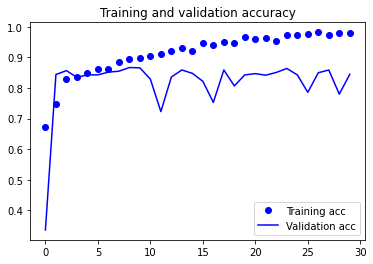

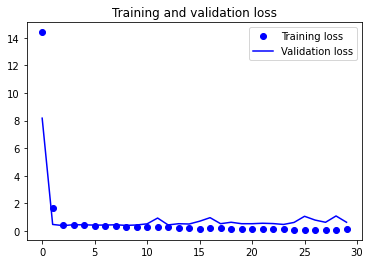

In [24]:
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

acc = history_trad.history['accuracy'] # set the accuracy measures to the variable acc
val_acc = history_trad.history['val_accuracy'] # set the validation accuracy measures to the variable val_acc
loss = history_trad.history['loss'] # set the loss measures to the variable loss
val_loss = history_trad.history['val_loss'] # set the validation loss measures to the variable val_loss

epochs = range(len(acc)) # number of epochs ran

plt.plot(epochs, acc, 'bo', label='Training acc') # plot the accuracy measures in blue dots
plt.plot(epochs, val_acc, 'b', label='Validation acc') # plot the validation accuracy measures in blue line
plt.title('Training and validation accuracy') # add title to plot
plt.legend() # add legend to plot

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') # plot the training loss measures in blue dots
plt.plot(epochs, val_loss, 'b', label='Validation loss') # plot the validation loss measures in blue line
plt.title('Training and validation loss') # add title to plot
plt.legend() # add legend to plot

plt.show()

These plots are typical of overfitting. Our training accuracy increases until it reaches nearly 100% around 20 epochs, while our validation accuracy flattens around 81%. Our validation loss reaches its minimum after only the first few epochs and then stalls, slowly increasing, while the training loss keeps decreasing until it reaches nearly 0. Because we have relatively few training samples, overfitting is going to be a major concern. To address this issue, we will investigate common techniques to help mitigate overfitting including dropout and data augmentation later in this report.

We will next look into fitting the convolutional network and seeing how the results compare to our previous models. The following code chunk will be fitting this convolutional neural net by using the generator we developed in this section. 

## *5- Fit Convolutional NN*

Using the generators developed in the previous section we will be using convolutional neural nets in this step:

In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, # after having drawn 100 batches from the generator, the fitting process will go to the epoch
      epochs=30,  # number of epochs used to run 
      validation_data=validation_generator, # yield validation data
      validation_steps=50)  # number of batches to draw from the validation generator

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 66s 653ms/step - loss: 0.5774 - acc: 0.6927 - val_loss: 0.5261 - val_acc: 0.6860
Epoch 2/30
100/100 [==============================] - 65s 646ms/step - loss: 0.4906 - acc: 0.7579 - val_loss: 0.5167 - val_acc: 0.7760
Epoch 3/30
100/100 [==============================] - 66s 660ms/step - loss: 0.4630 - acc: 0.8156 - val_loss: 0.5643 - val_acc: 0.8150
Epoch 4/30
100/100 [==============================] - 65s 647ms/step - loss: 0.5020 - acc: 0.7966 - val_loss: 0.4742 - val_acc: 0.8240
Epoch 5/30
100/100 [==============================] - 65s 648ms/step - loss: 0.4603 - acc: 0.8185 - val_loss: 0.4522 - val_acc: 0.8140
Epoch 6/30
100/100 [==============================] - 64s 645ms/step - loss: 0.4422 - acc: 0.8199 - val_loss: 0.4198 - val_acc: 0.8240
Epoch 7/30
100/100 [==============================] - 65s 652ms/step - loss: 0.3998 - acc: 0.8370 - val_loss: 0.3997 - val_acc: 0.8330
Epoch 8/30
100/100 [==============================] - 6

As with the previous model, we will be saving this trained model using the code below:

In [26]:
model.save('bb_class_conv.h5')  # creates a HDF5 file 'my_model.h5'

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')

Next, we will be plotting the loss and accuracy of the model over the training and validation data to compare to our previous models:

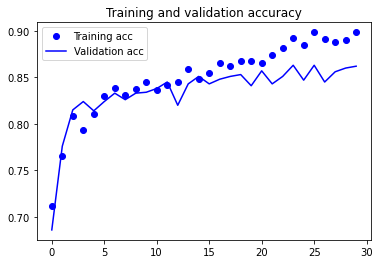

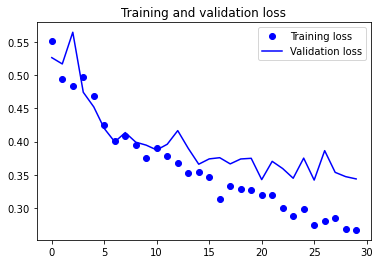

In [27]:
import matplotlib.pyplot as plt  # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python

acc = history.history['acc'] # set the accuracy measures to the variable acc
val_acc = history.history['val_acc']  # set the validation accuracy measures to the variable val_acc
loss = history.history['loss'] # set the loss measures to the variable loss
val_loss = history.history['val_loss']  # set the validation loss measures to the variable val_loss

epochs = range(len(acc)) # number of epochs ran

plt.plot(epochs, acc, 'bo', label='Training acc') # plot the accuracy measures in blue dots
plt.plot(epochs, val_acc, 'b', label='Validation acc') # plot the validation accuracy measures in blue line
plt.title('Training and validation accuracy') # add title to plot
plt.legend() # add legend to plot

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') # plot the training loss measures in blue dots
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # plot the validation loss measures in blue line
plt.title('Training and validation loss') # add title to plot
plt.legend()  # add legend to plot
 
plt.show()

Already we can notice a significant reduction in overfitting from the previous non-convolutional NN. This helps highlight the superior effectiveness of convnets for vision problems. The training accuracy keeps improving linearly over time, until it reaches 85% while the validation accuracy follows it relatively closely until epoch 20. 

In the next section, we will experiment with data augmentation, dropout, and extending the model structures and Callbacks as to observe the impact on our convnet model.

## Improving our Baseline ConvNet

### Using Data Augmentation, Dropout, Extending Model Structure & Callbacks

Overfitting is caused by having too few samples to learn from, which as a result makes us unable to train a model able to generalize to new data. **Data augmentation** takes the approach of generating more training data from existing training samples, via several random transformations that yield believable-looking images. This allows for when we train our model to not see the exact picture more than once. This helps the model get exposed to more aspects of the data and hence allowing it to generalize better. It is important to note that the inputs that the new network sees will still be heavily intercorrelated, reducing overfitting, but not eliminating it completely. In addition, we will also add a **Dropout** layer to our model, right before the densely connected classifier. This will randomly set input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Furthermore, to compensate for the fact that were dealing with bigger images and a complex problem, will add two Conv2D + MaxPooling2D stages.

Let us take a look at how this works:


In [28]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) # this was added from the initial convnet network
model2.add(layers.MaxPooling2D((2, 2))) # this was added from the initial convnet network
model2.add(layers.Conv2D(128, (3, 3), activation='relu')) # this was added from the initial convnet network
model2.add(layers.MaxPooling2D((2, 2))) # maxpool layer
model2.add(layers.Flatten())  
model2.add(layers.Dropout(0.5)) # dropout layer 
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)      

One will notice how the number of parameters have dropped (i.e. by approximatly 1 million) as a result of having added more convolutional layer to the initial convnet structure.

Next we will train our network using data augmentation and dropout:

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5530 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.


At this stage we are also going to be also using callbacks, in general a callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

More specifically, here is what we are attempting to do with them:
  1. **ModelCheckpoint:** When training requires a lot of time to achieve a good result, often many iterations are required. In this case, it is better to save a copy of the best performing model only when an epoch that improves the metrics ends.
  2. **ReduceLROnPlateau:** Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2–10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a ‘patience’ number of epochs, the learning rate is reduced.

In [32]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard #importing the appropriate libraries

learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7) 
# Monitor is the quantity to be monitored is
# Patience is number of epochs with no improvement after which learning rate will be reduced.


filepath="weights.best.hdf5" # loading the filepath 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# We decided to not use early stopping to interrupt the training since the time was manageable 

history = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[learn_control, checkpoint])

Epoch 1/30
100/100 [==============================] - 92s 911ms/step - loss: 0.6187 - acc: 0.6630 - val_loss: 0.4693 - val_acc: 0.7940

Epoch 00001: val_acc improved from -inf to 0.79400, saving model to weights.best.hdf5
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.5131 - acc: 0.7677 - val_loss: 0.5066 - val_acc: 0.7570

Epoch 00002: val_acc did not improve from 0.79400
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.4815 - acc: 0.8013 - val_loss: 0.4413 - val_acc: 0.8220

Epoch 00003: val_acc improved from 0.79400 to 0.82200, saving model to weights.best.hdf5
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.4613 - acc: 0.8119 - val_loss: 0.4290 - val_acc: 0.8280

Epoch 00004: val_acc improved from 0.82200 to 0.82800, saving model to weights.best.hdf5
Epoch 5/30
100/100 [==============================] - 100s 1000ms/step - loss: 0.4713 - acc: 0.7996 - val_loss: 0.5100 - val_acc: 0.7900

Epoch 0000

Saving model after training:

In [33]:
model2.save('bb_class_conv_v2.h5')

Finally, we get to plot the loss and accuracy of the model over the training and validation data during training to see if this has shown any impact on our model:

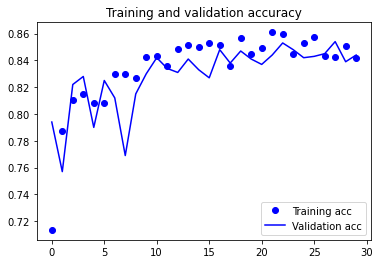

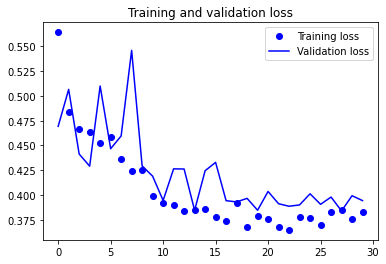

In [34]:
# the following code block is identical to our previous plots, with the exception of running the current model

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we have significantly reduced overfitting: the training curves are rather closely tracking the validation curves except for certain spikes. Unfortunately, the validation accuracy seems to plateau around 84%-85%. This is very similar to the result obtained with the convNet model built without any modifications. In some sense, this leads us to believe that this is the best we can do while having to build our own model from scratch. However, what would happen if we used a pretrained model. Considering the complexity of these images, as there are represent different types of each tumor within the benign and malignant class with different magnification. Not to mention, that a few thousand images is considered a small dataset in the specter of vision problems. 

Therefore, in the next section we showcase our exploration into the use of a pretrained convnet with DensNet201:

## Using a pre-trained convnet: DenseNet201

Pre-trained convnets are a common and highly effective approach to deep learning on small image datasets. By pre-trained we basically mean a network that has been trained previously on a larger dataset. Since these characteristics resonate with our project at hand, we are excited to see what it has in store for us. We chose to use DenseNet201 for our pretrained model based on some research on what would be an appropriate model to use. Naturally, several pretrained models were available to use, however the final decision came to DenseNet201 and this can be partially credited to its cool sounding name. DenseNet-201 is a convolutional neural network that is 201 layers deep trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images, something that we aim to leverage for our vision problem.[1]

We also made use of three layers including a global average pooling layer, a dropout layer (serving the same purpose as before), and a batch normalization layer. The global average pooling (GAP) layer was inserted with the idea to minimize overfitting by reducing the total number of parameters in the model. Like max pooling layers, GAP layers are used to reduce the spatial dimensions of a three-dimensional tensor. The batch normalization layer was added which is considered a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. The motivation to integrate the layers into this model stemmed from conducting research into best practices and combined with our professional curiosity of their potential impact.[2][3][4]

* [1] https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow
* [2] https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Batch%20normalization%20is%20a%20technique,required%20to%20train%20deep%20networks.
* [3] https://towardsdatascience.com/paper-review-densenet-densely-connected-convolutional-networks-acf9065dfefb
* [4] https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/#:~:text=Average%20pooling%20involves%20calculating%20the,6%C3%976%20feature%20map.

So let us begin:

In [35]:
from tensorflow.keras.applications import DenseNet201 # importing DenseNet201 which optionally loads weights pre-trained on ImageNet
from tensorflow.keras.models import Sequential

def build_model(backbone, lr=1e-4): # this function assembles our model by adding the layers while also compiling it
    model4 = Sequential()
    model4.add(backbone)
    model4.add(layers.GlobalAveragePooling2D()) # reducing the total number of parameters in the model
    model4.add(layers.Dropout(0.5)) # Dropout layer
    model4.add(layers.BatchNormalization()) # standardizes the inputs to a layer for each mini-batch
    model4.add(layers.Dense(1, activation='sigmoid'))
    
    model4.compile(
        loss='binary_crossentropy', # Computes the cross-entropy loss between true labels and predicted labels
        optimizer=optimizers.RMSprop(lr=lr),
        metrics=['accuracy']
    )
    return model4

resnet = DenseNet201(
    weights='imagenet', # loading weights saved on kera's imagenet 
    include_top=False, # allowing a new output layer to be added and trained
    input_shape=(150,150,3)
)

model4 = build_model(resnet, lr = 1e-4)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 4, 4, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1920)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1921      
Total params: 18,331,585
Trainable params: 18,098,689
Non-trainable params: 232,896
_________________________________________________________________


An important observation from the model summary is that there are over 18 million trainable parameters. This would end up taking over half a day to run all in the name of research! Our previous models never allowed for more than 5 million parameters. Although this huge amount of parameters would raise some expected suspicious into this model's likelihood of overfitting on our training data, our theory relied on the complexity of our images and that our previous models were not able to pick up on certain small yet crucial details in an image. Not to mention it takes pathologist years of training to be able to accurately diagnose a tumor, suddenly half a day didn't seem like such a sacrifice.

We will reintroduce the callbacks as we did before:

In [36]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

filepath="weights_m4.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model4.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[learn_control, checkpoint])

Epoch 1/30
100/100 [==============================] - 1176s 11s/step - loss: 0.5387 - accuracy: 0.7395 - val_loss: 0.8229 - val_accuracy: 0.6890

Epoch 00001: val_accuracy improved from -inf to 0.68900, saving model to weights_m4.best.hdf5
Epoch 2/30
100/100 [==============================] - 1033s 10s/step - loss: 0.3440 - accuracy: 0.8835 - val_loss: 1.6879 - val_accuracy: 0.6800

Epoch 00002: val_accuracy did not improve from 0.68900
Epoch 3/30
100/100 [==============================] - 1011s 10s/step - loss: 0.2613 - accuracy: 0.9152 - val_loss: 1.3493 - val_accuracy: 0.7030

Epoch 00003: val_accuracy improved from 0.68900 to 0.70300, saving model to weights_m4.best.hdf5
Epoch 4/30
100/100 [==============================] - 1018s 10s/step - loss: 0.2706 - accuracy: 0.8973 - val_loss: 0.4093 - val_accuracy: 0.8760

Epoch 00004: val_accuracy improved from 0.70300 to 0.87600, saving model to weights_m4.best.hdf5
Epoch 5/30
100/100 [==============================] - 1011s 10s/step - lo

This is an alternative visual to showing our validation and loss graphs

<AxesSubplot:>

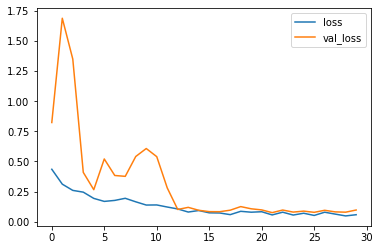

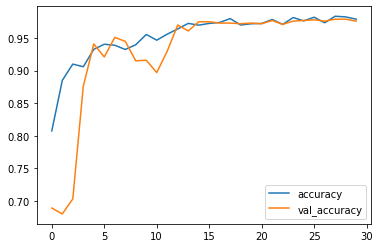

In [37]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

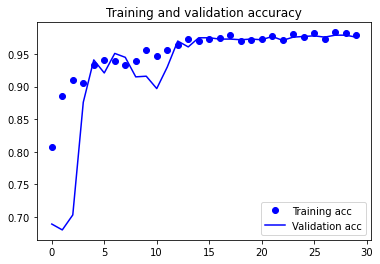

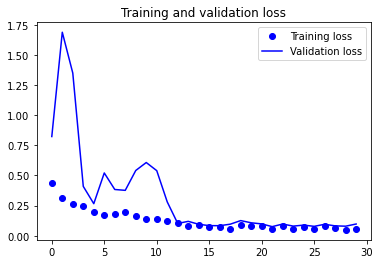

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Using these steps to further enhance the model, we are pleased to finally get a highly validation accuracy of roughly 97% to 98%. We experimented with data augmentation, dropout, callbacks to reach this level of accuracy and eliminate over fitting, which we see in the training curve nicely following the validation curve. It can be observed how the batch normalization layer seemed to really take into affect with our validation accuracy visibly stabilizing around the 15th epoch. Although we were worried for the potential of overfitting, this model not only performed the best by over 10% but also minimized overfitting to its lowest.

Having now concluded building and fitting our models, we will now test their accuracy on the test data and analyze their confusion matrix.

## Accuracy Measurements

Finally we will test our three trained models on the test data (i.e. 1185 images) which they have never seen yet as to evaluate their accuracy.

In [39]:
# This code block properly formats our test data, similar to our training data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False) # make sure that the test data is not shuffled to accuratly perform the confusion matrix

Found 1185 images belonging to 2 classes.


We will be using confusion matrices to clearly display the results of our work with different models in this notebook. 

A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. We expect this to clearly show us the following:

true positives (TP): These are cases in which we predicted yes (they have malignant tumors) when they did not.

true negatives (TN): We predicted no, and they did not have malignant tumors.

false positives (FP): We predicted yes, but they did not have malignant tumors (Also known as a "Type I 
error.")

false negatives (FN): We predicted no, but they do have malignant tumors. (Also known as a "Type II error.")

We will be paying close attention to both type I and type II errors. However, it should be mentioned that our priority will be placed on minimizing Type II error, since predicting that a cancerous tumour is non-cancerous has the potential to have the most serious consequences to the patient.

The following code block consists of a function built to form the Confusion Matrix. 
Reference: https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

In [40]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues): # if was decided to not normalize the results as this is easier to interpret
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10)) # format size of plot

    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title) # assign the input variable title to the plot
    plt.colorbar() # adds a color bar next to plot

    tick_marks = np.arange(len(classes)) # assigns the two classes to variable tick_marks
    plt.xticks(tick_marks, classes, rotation=45) # formats the tick marks for x lable
    plt.yticks(tick_marks, classes) # formats the tick marks for y lable

    if normalize: # this if statement is irrelevant
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else: # always proceed to else statement
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
#Assign the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

print(target_names)

['benign', 'malignant']


### Non-Convolutional NN

In [42]:
test_loss, test_acc = network.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8190000057220459


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


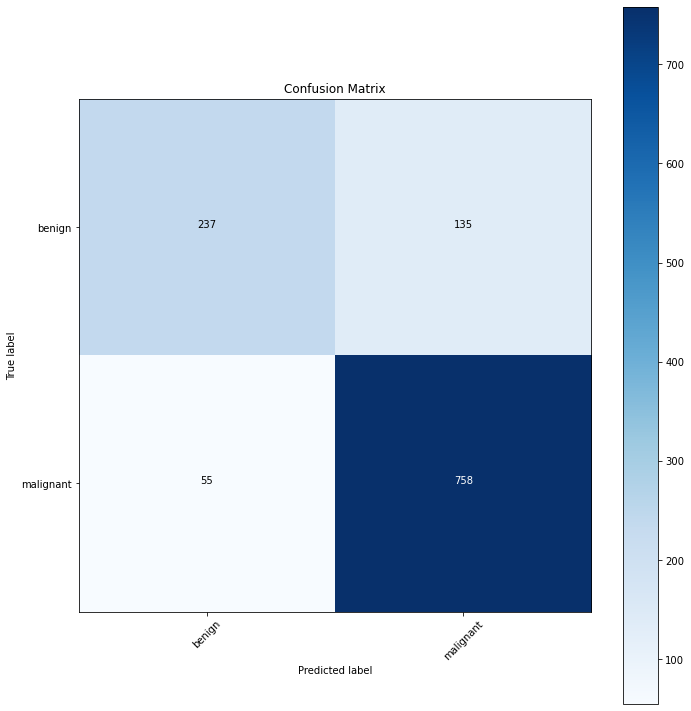

In [45]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix 

Y_pred = network.predict_generator(test_generator)
y_pred_r = np.round(Y_pred) # rounded predictions
flat_list = [item for sublist in y_pred_r for item in sublist]
y_pred = [int(a) for a in flat_list] # changing points to integers 

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred) # running the Keras built in confusion matrix model
plot_confusion_matrix(cm, target_names, title='Confusion Matrix') # plotting the matrix 

With an accuracy of 81%, it is no surprise that our baseline non-convet model performed the worst on every front.

Type II error: We see that our Non convolutional NN resulted in an inaccuracy prediction of 55 benign cases when they were malignant. This is concerning because in our case it would mean that these breast cancer patients would have potentially wrongfully left untreated, facing a dangerous escalation of state.

Type I error: We also see 135 cases of benign cases wrongfully predicted as malignant. This would result in potentially unnecessary trauma of undergoing treatment, not to mention the cost and other associated inconveniences. 

These results are supported through the Classification Report below.

In [46]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.81      0.64      0.71       372
   malignant       0.85      0.93      0.89       813

    accuracy                           0.84      1185
   macro avg       0.83      0.78      0.80      1185
weighted avg       0.84      0.84      0.83      1185



### Convolutional NN

In [47]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8299999833106995


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


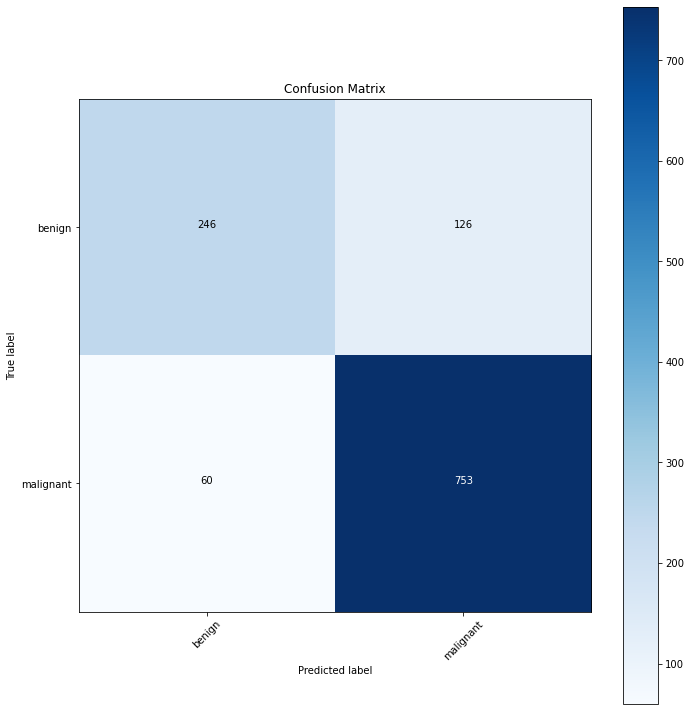

In [48]:
#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred_r = np.round(Y_pred)
flat_list = [item for sublist in y_pred_r for item in sublist]
y_pred = [int(a) for a in flat_list]

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [49]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.80      0.66      0.73       372
   malignant       0.86      0.93      0.89       813

    accuracy                           0.84      1185
   macro avg       0.83      0.79      0.81      1185
weighted avg       0.84      0.84      0.84      1185



Most surprisingly from this report consisted of the relatively low performance of our baseline convet model compared to our non-convnet model. Not to mentionned it actually performed worst in terms of minimizing the rate of type II errors, having misclassified 60 compared to the non-convnet's 55. This was dissapointing to say the least. A potential explanation would simply suggest that given less than 5 millions params this was the best that a model from scratch could do. This would lead us to beleive that the additional tunning of these models would lead to only minor improvements in the overall accuracyof the models.

### Convolutional NN w/ Modifications

In [50]:
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8240000009536743


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


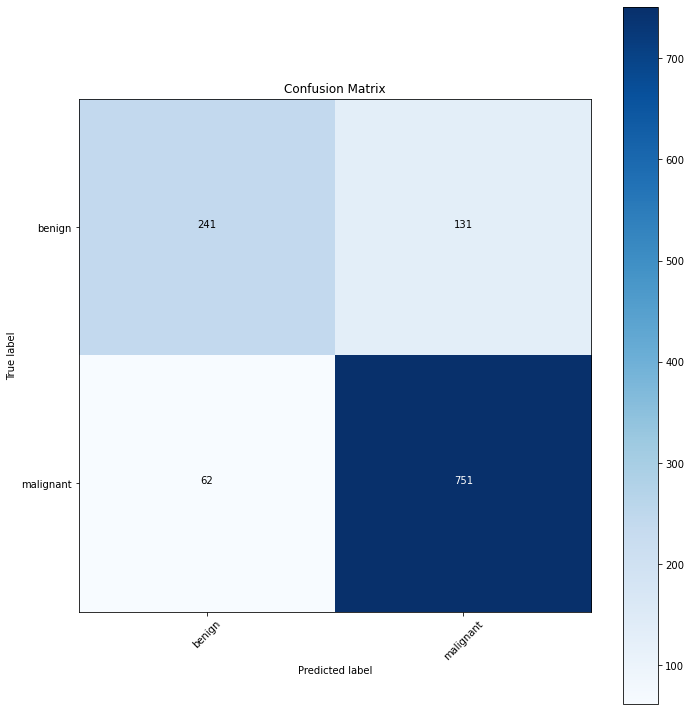

In [51]:
#Confution Matrix 

Y_pred = model2.predict_generator(test_generator)
y_pred_r = np.round(Y_pred)
flat_list = [item for sublist in y_pred_r for item in sublist]
y_pred = [int(a) for a in flat_list]

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [52]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.80      0.65      0.71       372
   malignant       0.85      0.92      0.89       813

    accuracy                           0.84      1185
   macro avg       0.82      0.79      0.80      1185
weighted avg       0.83      0.84      0.83      1185



The awfully similar performance of our updated convet in regard to both the non-convnet and baseline convnet would reinforce the belief that the models were not dense enough to capture all the necessary elements of each image. This is support by the impressive performance of our pretrained model.

Type II error: We see that our Non convolutional NN resulted in an inaccuracy prediction of 62 benign cases when they were actually malignant. This is concerning because in our case it would mean that these breast cancer patients would have potentially wrongfully left untreated, facing a dangerous escalation of state. 

Type I error: We also see 131 cases of benign cases wrongfully predicted as malignant. This would result in potentially unnecessary trauma of undergoing treatment, not to mention the cost and other associated inconveniences.


### Convolutional NN w/ Pre-Trained Model: DenseNet201

In [53]:
test_loss, test_acc = model4.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9779999852180481


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


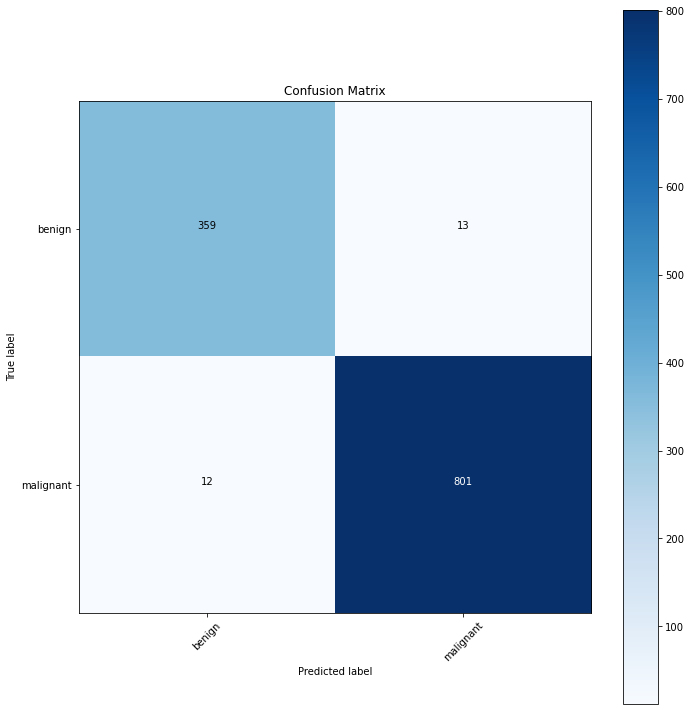

In [54]:
import itertools 
#Confution Matrix 

Y_pred = model4.predict_generator(test_generator)
y_pred_r = np.round(Y_pred)
flat_list = [item for sublist in y_pred_r for item in sublist]
y_pred = [int(a) for a in flat_list]

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [55]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.97      0.97      0.97       372
   malignant       0.98      0.99      0.98       813

    accuracy                           0.98      1185
   macro avg       0.98      0.98      0.98      1185
weighted avg       0.98      0.98      0.98      1185



Finally, the convnet with the pretrained model and over 18 million params performed the absolute best by a wide margin of over 15%. Minimizing the false negative to only 12 miss-classifications out of 813 images representing an impressive error rate of 1.48%. This was indeed a very much welcomed surprise and helped stress the importance of properly aligning the complexity of your model with that of your images. We will now provide our conclusion.

## Conclusion 

In this report, we went over multiple Neural Net models to tackle the problem of misclassifications of breast cancer patients. Breast Cancer is the second leading cause of cancer deaths in North America and we hoped to examine how deep learning can contribute to solving the problem of these misclassifications. 

Our results took a long time to develop, since we constructed multiple models and experimented with various tools of improvement, but we believe that the effort paid off with our final model resulting in 98% accuracy. However, when we think that since there is still a chance of wrongfully classifying a patient as benign or malignant cases, this approach is best used as an additional tool in the toolkit of pathologists when they make their final decisions. We hope that this would be an extra layer of confirmation or error proofing rather than a definitive authority when it comes to the faith of patients. 

Our pretrained model which used leveraged the pretrained model DenseNet201, proved to be the best way to approach this problem. The portability of using the trained features of this model acted as a key advantage in comparison to our other work. Our mentioned previously, one of our main takeaways from this journey consisted the importance of ensuring that the model depth and complexity appropriately reflects the data processed. Both three models before attempting the DenseNet201, seemed to be stuck around the low to mid 80s regardless of any improvements or modifications brought to the model. Thankfully, however, with a little patience we achieved our goal of developing a model that we believe could benefit pathologist in confirming their diagnosis and bringing more confidence and certainty to a potential life altering diagnosis.

In our Appendix below, we have attached some work performed that simply followed the steps used in the textbook "Deep Learning with Python" by Francois Chollet, in the authors attempt to leverage the pretrained model VGG16 to a vision problem. Out of curiosity, we attempted to replicate the steps used and decided to post the results. This added section is not part of our report and only serves as an extra section if the reader is interested. In quick summary, the final model obtained an accuracy of 87%, which is better than our first three models, however 10% less accurate than our final DenseNet201 model, perhaps reflecting that DenseNet201 was a superior choice over VGG16 or that it simply had less than half the number of trainable params than our model. Notice, because this is not part of our final report, we did not include any comments as we were only interested in the final results and any information regarding the methodology can be referenced in the textbook.

# Appendix

## Using a pre-trained convnet: VGG16 based on "Deep Learning with Python" by Francois Chollet

### Feature Extraction

In [56]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', #weights, to specify which weight checkpoint to initialize the model from
                  include_top=False, #include_top, which refers to including or not the densely-connected classifier on top of the network. By default, this densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected classifier (with only two classes, cat and dog), we don't need to include it.
                  input_shape=(150, 150, 3)) #input_shape, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, then the network will be able to process inputs of any size.


In [57]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [58]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 5530)
validation_features, validation_labels = extract_features(validation_dir, 1185)
test_features, test_labels = extract_features(test_dir, 1185)

Found 5530 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.


In [59]:
train_features = np.reshape(train_features, (5530, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1185, 4 * 4 * 512))
test_features = np.reshape(test_features, (1185, 4 * 4 * 512))

In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model3 = models.Sequential()
model3.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model3.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Epoch 1/30
277/277 [==============================] - 12s 22ms/step - loss: 0.6234 - acc: 0.6680 - val_loss: 0.5312 - val_acc: 0.7316
Epoch 2/30
277/277 [==============================] - 6s 22ms/step - loss: 0.5323 - acc: 0.7346 - val_loss: 0.4968 - val_acc: 0.7570
Epoch 3/30
277/277 [==============================] - 6s 22ms/step - loss: 0.4982 - acc: 0.7605 - val_loss: 0.4802 - val_acc: 0.7865
Epoch 4/30
277/277 [==============================] - 6s 21ms/step - loss: 0.4587 - acc: 0.7876 - val_loss: 0.4577 - val_acc: 0.7865
Epoch 5/30
277/277 [==============================] - 6s 21ms/step - loss: 0.4418 - acc: 0.7968 - val_loss: 0.4484 - val_acc: 0.7916
Epoch 6/30
277/277 [==============================] - 6s 22ms/step - loss: 0.4296 - acc: 0.8054 - val_loss: 0.4353 - val_acc: 0.7966
Epoch 7/30
277/277 [==============================] - 6s 21ms/step - loss: 0.4084 - acc: 0.8213 - val_loss: 0.4307 - val_acc: 0.8101
Epoch 8/30
277/277 [==============================] - 6s 23ms/step -

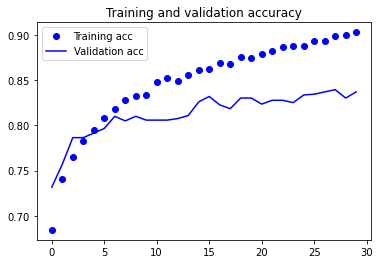

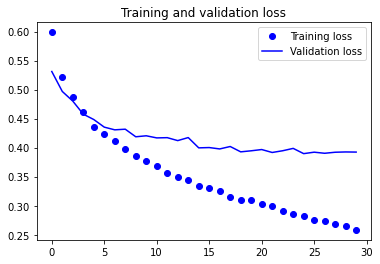

In [61]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
from tensorflow.keras import models
from tensorflow.keras import layers

model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [64]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [65]:
conv_base.trainable = False

In [66]:

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model3.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model3.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 5530 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 371s - loss: 0.5881 - acc: 0.7025 - val_loss: 0.5669 - val_acc: 0.6980
Epoch 2/30
100/100 - 369s - loss: 0.5614 - acc: 0.7111 - val_loss: 0.5391 - val_acc: 0.7070
Epoch 3/30
100/100 - 370s - loss: 0.5320 - acc: 0.7340 - val_loss: 0.5147 - val_acc: 0.7460
Epoch 4/30
100/100 - 414s - loss: 0.5131 - acc: 0.7455 - val_loss: 0.5180 - val_acc: 0.7280
Epoch 5/30
100/100 - 413s - loss: 0.5043 - acc: 0.7447 - val_loss: 0.4912 - val_acc: 0.7530
Epoch 6/30
100/100 - 424s - loss: 0.4991 - acc: 0.7705 - val_loss: 0.4769 - val_acc: 0.7750
Epoch 7/30
100/100 - 390s - loss: 0.4735 - acc: 0.7759 - val_loss: 0.5008 - val_acc: 0.7420
Epoch 8/30
100/100 - 372s - loss: 0.4847 - acc: 0.7688 - val_loss: 0.4957 - val_acc: 0.7460
Epoch 9/30
100/100 - 369s - loss: 0.4603 - acc: 0.7865 - val_loss: 0.4614 - val_acc: 0.7920
Epoch 10/30
100/100 - 369s - loss: 0.4732 - acc: 0.7790 - val_loss: 0.4575 - val_acc: 0.7970
Epoch 11/30
100/100 - 377s - loss: 0.4523 - acc: 0.8010 - val_loss: 0.4564 - va

In [68]:
model3.save('bb_class_pretrained.h5')

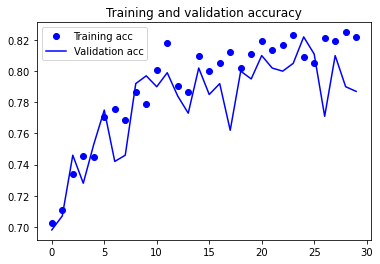

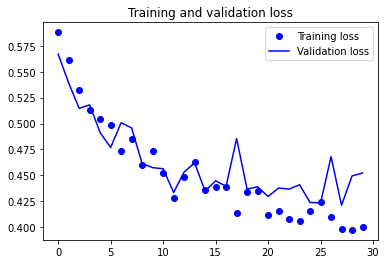

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine-tuning


In [70]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [71]:

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [78]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [72]:

model3.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model3.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 457s 5s/step - loss: 0.4501 - acc: 0.7952 - val_loss: 0.4266 - val_acc: 0.8040
Epoch 2/30
100/100 [==============================] - 449s 4s/step - loss: 0.3788 - acc: 0.8399 - val_loss: 0.3781 - val_acc: 0.8390
Epoch 3/30
100/100 [==============================] - 422s 4s/step - loss: 0.3559 - acc: 0.8571 - val_loss: 0.4192 - val_acc: 0.8250
Epoch 4/30
100/100 [==============================] - 438s 4s/step - loss: 0.4112 - acc: 0.8282 - val_loss: 0.3498 - val_acc: 0.8590
Epoch 5/30
100/100 [==============================] - 442s 4s/step - loss: 0.3845 - acc: 0.8435 - val_loss: 0.3472 - val_acc: 0.8440
Epoch 6/30
100/100 [==============================] - 426s 4s/step - loss: 0.3496 - acc: 0.8493 - val_loss: 0.4563 - val_acc: 0.8230
Epoch 7/30
100/100 [==============================] - 426s 4s/step - loss: 0.3539 - acc: 0.8464 - val_loss: 0.3413 - val_acc: 0.8560
Epoch 8/30
100/100 [==============================] - 467s 5s/step - 

In [73]:

model3.save('bb_class_fine_tuning.h5')

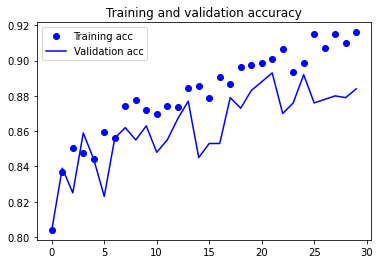

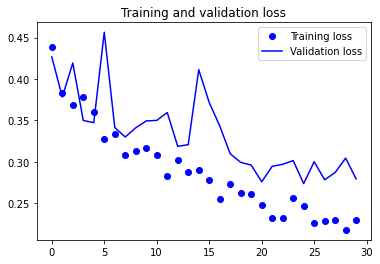

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Convolutional NN w/ Pre-Trained Model + Feature Extraction & Tuning: VGG16 - RESULTS

In [75]:
test_loss, test_acc = model3.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.8799999952316284


C:\Users\const\anaconda3\envs\triskelion\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Confusion matrix, without normalization


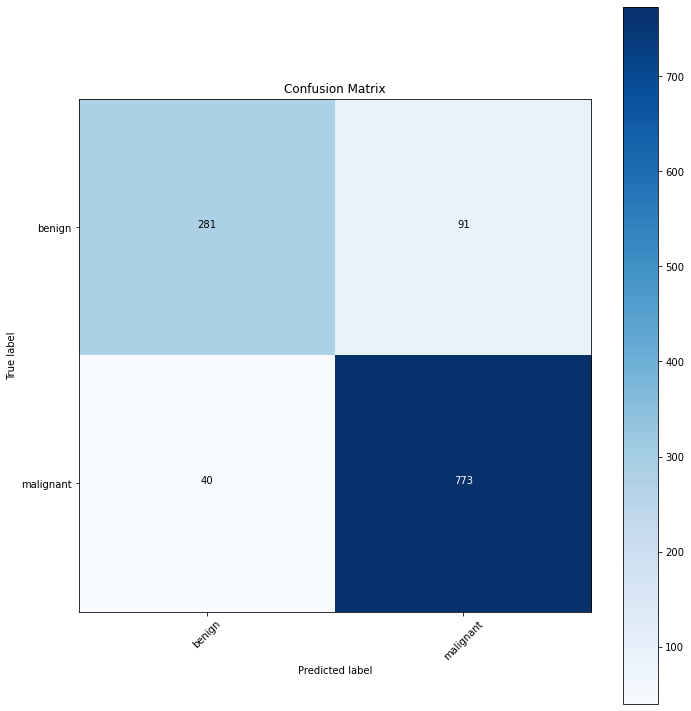

In [76]:
#Confution Matrix 

Y_pred = model3.predict_generator(test_generator)
y_pred_r = np.round(Y_pred)
flat_list = [item for sublist in y_pred_r for item in sublist]
y_pred = [int(a) for a in flat_list]

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [77]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      benign       0.88      0.76      0.81       372
   malignant       0.89      0.95      0.92       813

    accuracy                           0.89      1185
   macro avg       0.89      0.85      0.87      1185
weighted avg       0.89      0.89      0.89      1185

